<a href="https://colab.research.google.com/github/wiktor1468/StudentsStudyPerformance/blob/main/StudentsStudyPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Students performance in exams

This project shows how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

My goal is to understand the influence of the parent's background, test preparation, Gender, Ethnicity and lunch on students' performance

And prepare **regression models** to predict  math's scores based on available features

# Workflow stages:

1. Exploration of data

* Identify numerical, categorical, and alphanumeric features
* Understdanding structure and contest

2. Check for data leakage
3. Data Preprocessing and Feature Engineering
* Categorize data and encode categorical features
* Creating new features like average_score
* Potential standardization
4. Data visualization
* Visualize relationships between different features and survival using plots(bar plot, scatterplot, histplot, violin plot) and correlation heatmaps
5. Choosing models
* Linear Regresion
* Gradien Boosting Machines
* DTS
* Polynomial Regresion
6. Summary and potential Improvements


#Read the csv file
Import libraries

In [ ]:
import pandas as pd
import seaborn as sns

df= pd.read_csv('/content/drive/MyDrive/ML/study_performance.csv')

In [ ]:
pd.set_option('display.max_columns',None)# this makes head() function to show all columns
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Features

In [ ]:
df.describe(include='all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


**Numerical features:** math_score, reading_score, writing_score

**Categorical Features:** gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course



#Checking for missing data, duplicates

In [ ]:
df.isnull().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing data**

In [ ]:
duplicates = df.duplicated().sum()
print("Total Duplicates:", duplicates)

Total Duplicates: 0


# Data categorization

Features which are **Categorical** has to be categorizied.

So: gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course will be set to categories

First I have to check wether there are rarely used values. Next step is to devise a strategy for categorizing them differently. This might involve creating a specialized category ("Others") where these outlier values can be grouped together. Or those values can join other more popullar ones

## Gender

In [ ]:
df['_gender'] = pd.Categorical(df['gender']).codes
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [ ]:
print(dict(enumerate(pd.Categorical(df['gender']).categories)))

{0: 'female', 1: 'male'}


## Race

In [ ]:
race_distribution =(df['race_ethnicity'].value_counts()/len(df)*100) #count the occurrence of a value in a particular column
print(race_distribution)

race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: count, dtype: float64


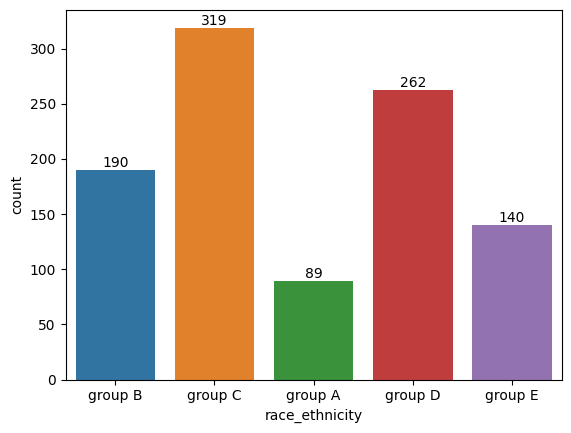

In [ ]:
countplot = sns.countplot(data = df, x='race_ethnicity',hue='race_ethnicity' )
for container in countplot.containers:
      countplot.bar_label(container, label_type='edge')

Group A is a distinct value

In [ ]:
df['_race_ethnicity'] = pd.Categorical(df.race_ethnicity).codes #converts its values into categorical codes

In [ ]:
categories_with_codes = dict(enumerate(pd.Categorical(df['race_ethnicity']).categories)) #dictionary where the keys are the numerical codes and the values are the corresponding categories
print(categories_with_codes)

{0: 'group A', 1: 'group B', 2: 'group C', 3: 'group D', 4: 'group E'}


## Parental_level_of_education

In [ ]:
print(df['parental_level_of_education'].value_counts())#count the occurrence of a value in a particular column
print()
parental_level_of_education_distribution =(df['parental_level_of_education'].value_counts()/len(df)*100) #count the occurrence of a value in a particular column
print(parental_level_of_education_distribution)

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: count, dtype: float64


Master's degree seems to be rare value, so patterns connected to this category should be watched closely

In [ ]:
df['_parental_level_of_education'] = pd.Categorical(df['parental_level_of_education']).codes #converts its values into categorical codes

In [ ]:
print(dict(enumerate(pd.Categorical(df['parental_level_of_education']).categories)))

{0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}


## lunch

In [ ]:
print(f"",df['lunch'].value_counts(), "",df['lunch'].value_counts()/len(df)*100)

 lunch
standard        645
free/reduced    355
Name: count, dtype: int64  lunch
standard        64.5
free/reduced    35.5
Name: count, dtype: float64


In [ ]:
df['_lunch']= pd.Categorical(df['lunch']).codes #converts its values into categorical codes

In [ ]:
print(dict(enumerate(pd.Categorical(df['lunch']).categories)))

{0: 'free/reduced', 1: 'standard'}


## test preparation

In [ ]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [ ]:
df['_test_preparation_course']= pd.Categorical(df['test_preparation_course']).codes #converts its values into categorical codes

In [ ]:
print(dict(enumerate(pd.Categorical(df['test_preparation_course']).categories)))

{0: 'completed', 1: 'none'}


In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender,_race_ethnicity,_parental_level_of_education,_lunch,_test_preparation_course
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1


# Correaltion heatmap

<Axes: >

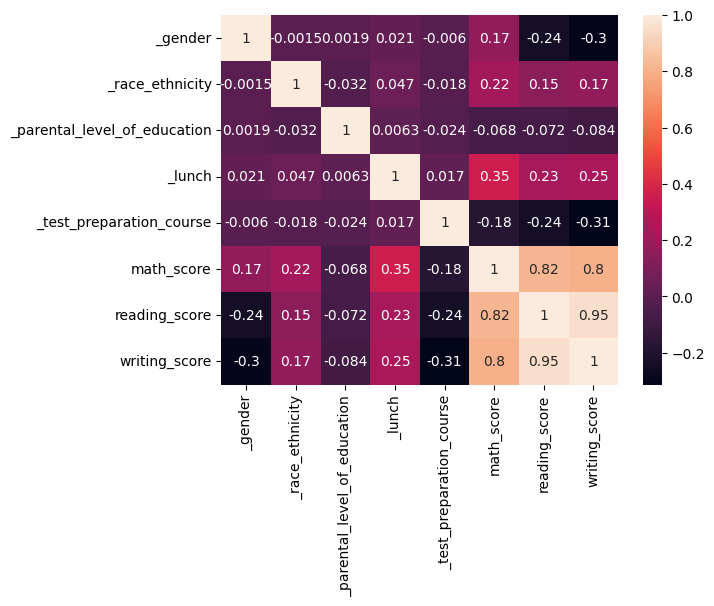

In [ ]:
cols = ['_gender',	'_race_ethnicity',	'_parental_level_of_education',	'_lunch',	'_test_preparation_course', 'math_score',	'reading_score',	'writing_score' ]
corr = df[cols].corr()
sns.heatmap(corr, annot=True)

Lunch(0.29) and test_preparation(0.26) might have impact on reuslts in exams

# Standardization

To choose the best scaler to our data I have to look closely at properties in every column. Important thing is to check if there are **outliers values**
*(If some outliers are present in the set, robust scalers or other transformers can be more appropriate)*

Visialization of this columns might also be very important to decide what to choose

**However in this case there are no outliers values and data plot is similar to a normal distribution plot, so at this point standardization of those columns will be omitted**

# Data visualization

## Average score

In [ ]:

df['average_score'] = df[['math_score', 'writing_score', 'reading_score']].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender,_race_ethnicity,_parental_level_of_education,_lunch,_test_preparation_course,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1,72.666667
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0,82.333333
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1,49.333333
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1,76.333333


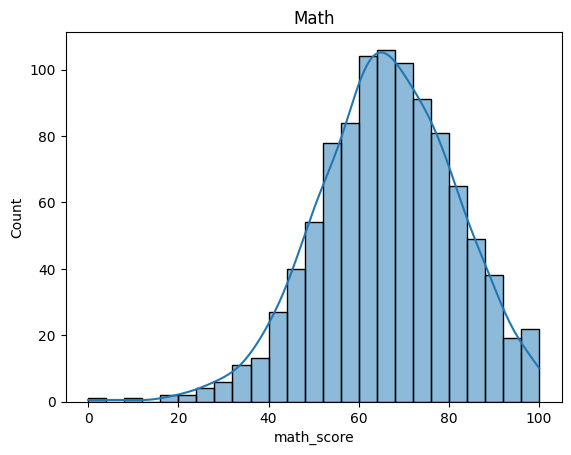

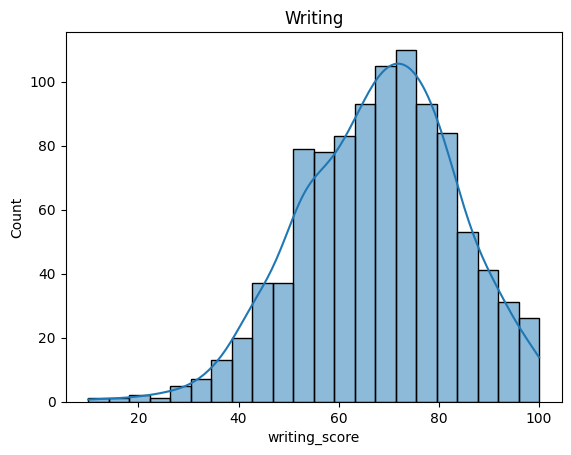

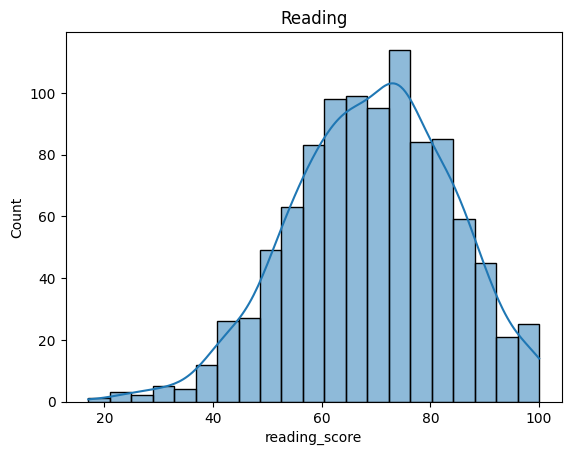

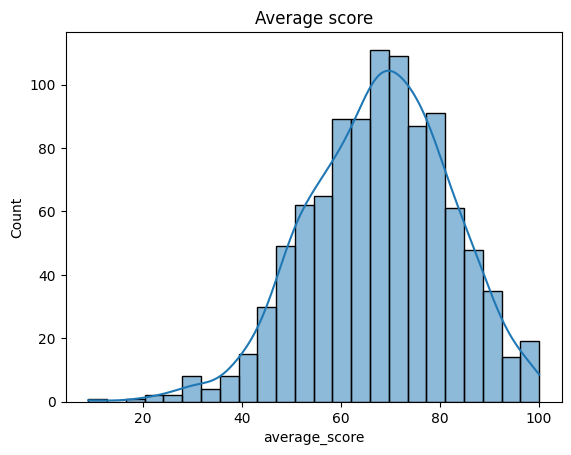

In [ ]:
import matplotlib.pyplot as plt


sns.histplot(df['math_score'], kde=True) #kde- density plot
plt.title('Math')
plt.show()
sns.histplot(df['writing_score'], kde=True) #kde- density plot
plt.title('Writing')
plt.show()
sns.histplot(df['reading_score'], kde=True) #kde- density plot
plt.title('Reading')
plt.show()

sns.histplot(df['average_score'], kde=True) #kde- density plot
plt.title('Average score')
plt.show()

## Relation beetwen scores

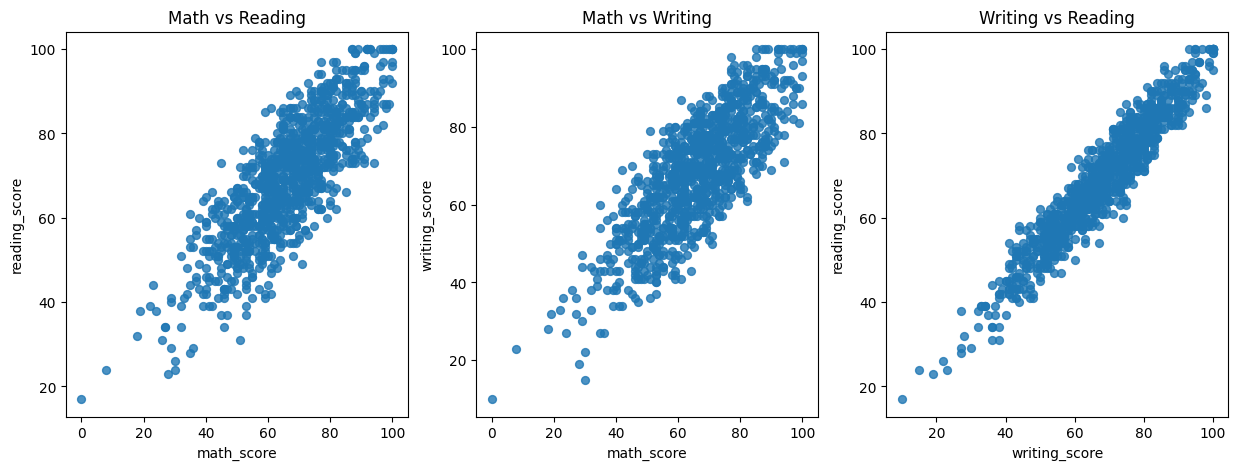

In [ ]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot 1: Math vs Reading
df.plot(kind='scatter', x='math_score', y='reading_score', s=32, alpha=.8, ax=axs[0]) #assigns this plot to the first subplot (index 0)
axs[0].set_title('Math vs Reading')

# Scatter plot 2: Math vs Writing
df.plot(kind='scatter', x='math_score', y='writing_score', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('Math vs Writing')

# Scatter plot 3: Writing vs Reading
df.plot(kind='scatter', x='writing_score', y='reading_score', s=32, alpha=.8, ax=axs[2])
axs[2].set_title('Writing vs Reading')
plt.show()

<Axes: >

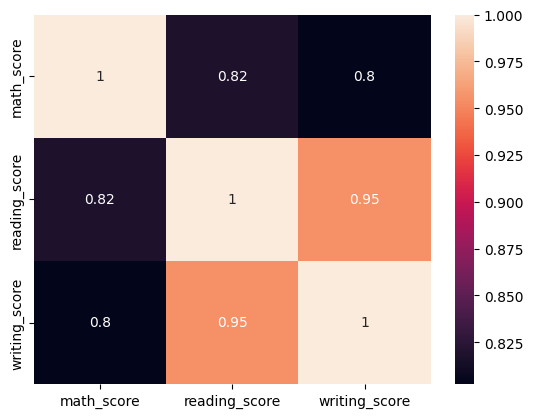

In [ ]:
cols = [ 'math_score',	'reading_score',	'writing_score' ]
corr = df[cols].corr()
sns.heatmap(corr, annot=True)

There are high correlaction beetwen results in every subject. The most correlated is reading vs writing (0.95)

## Scatter plot of reading vs writing with multiple classes

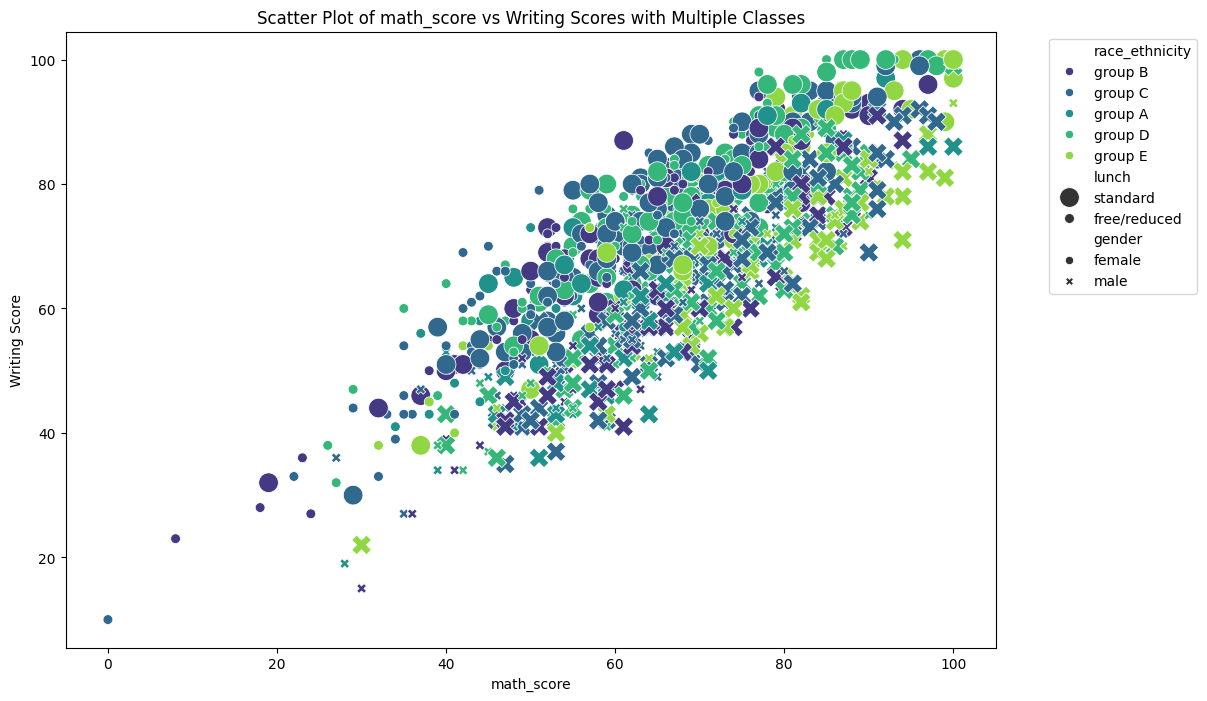

In [ ]:
# Plot settings
plt.figure(figsize=(12, 8))

# Create a pair plot to capture all features
sns.scatterplot(data=df, x='math_score', y='writing_score', hue='race_ethnicity', style='gender', size='lunch', sizes=(50, 200), palette='viridis', edgecolor='w')

# Adding labels and title
plt.xlabel('math_score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot of math_score vs Writing Scores with Multiple Classes')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Female with standard lunch has better performance in writting score than male with standard lunch.

All sex has tendency to perform worse without lunch

## Math score influenced by various features

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


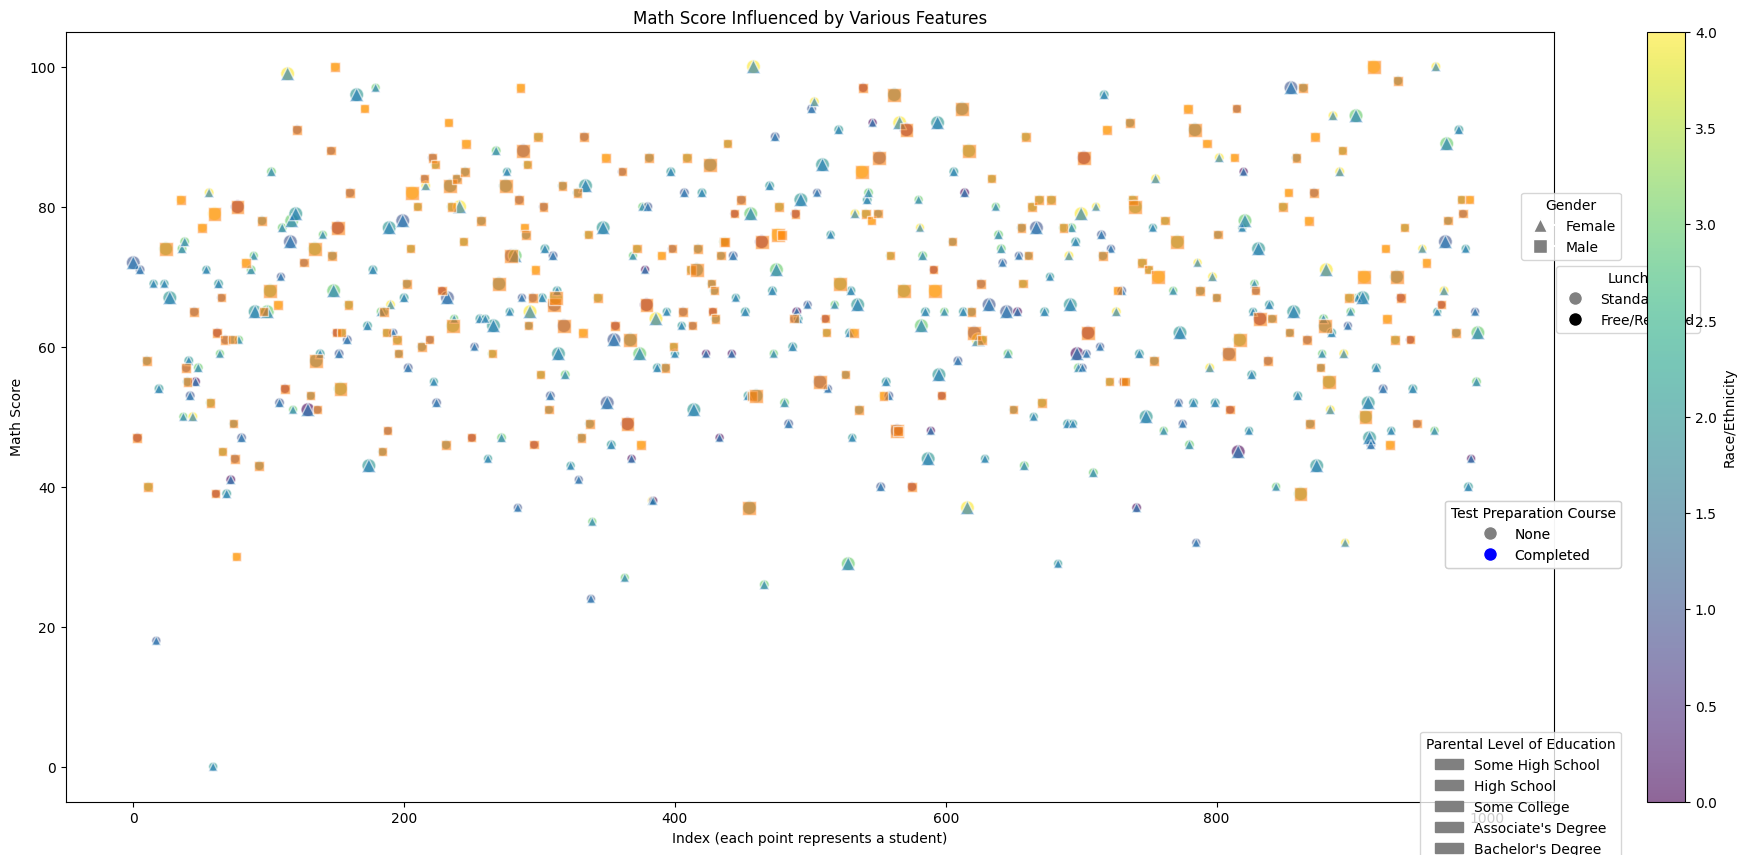

In [ ]:
plt.figure(figsize=(24, 10))

# Create a scatter plot
scatter = plt.scatter(
    x=df.index,  # Use index to spread data points along x-axis
    y=df['math_score'],
    c=df['_race_ethnicity'],  # Color by race/ethnicity
    cmap='viridis',
    s=(df['_parental_level_of_education'] + 1) * 50,  # Size by parental level of education
    alpha=0.6,
    edgecolor='w',
    marker='o'  # Use different marker types if needed
)

# Adding a legend for color (race/ethnicity)
cbar = plt.colorbar(scatter)
cbar.set_label('Race/Ethnicity')

# Overlay gender with different markers
for gender in df['_gender'].unique():
    plt.scatter(
        x=df.index[df['_gender'] == gender],
        y=df['math_score'][df['_gender'] == gender],
        s=(df['_parental_level_of_education'][df['_gender'] == gender] + 1) * 50,
        alpha=0.6,
        edgecolor='w',
        label=f'Gender {gender}',
        marker='^' if gender == 0 else 's'  # Use different markers for gender
    )

# Adding labels and title
plt.xlabel('Index (each point represents a student)')
plt.ylabel('Math Score')
plt.title('Math Score Influenced by Various Features')
import matplotlib.patches as mpatches

# Custom legend for parental level of education
# Custom legends
legend_labels = ['Some High School', 'High School', 'Some College', 'Associate\'s Degree', 'Bachelor\'s Degree', 'Master\'s Degree']
handles = [mpatches.Circle((0, 0), radius=5, color='gray', label=legend_labels[i]) for i in range(len(legend_labels))]
legend1 = plt.legend(handles=handles, title='Parental Level of Education', loc='best', bbox_to_anchor=(1.05, 0.1))

# Gender legend
gender_labels = ['Female', 'Male']
gender_handles = [plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', markersize=10, label=gender_labels[0]),
                  plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=10, label=gender_labels[1])]
legend2 = plt.legend(handles=gender_handles, title='Gender', loc='best', bbox_to_anchor=(1.05, 0.8))

# Lunch legend
lunch_labels = ['Standard', 'Free/Reduced']
lunch_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label=lunch_labels[0]),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label=lunch_labels[1])]
legend3 = plt.legend(handles=lunch_handles, title='Lunch', loc='lower center', bbox_to_anchor=(1.05, 0.6))

# Test preparation course legend
prep_labels = ['None', 'Completed']
prep_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label=prep_labels[0]),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=prep_labels[1])]
legend4 = plt.legend(handles=prep_handles, title='Test Preparation Course', loc='best', bbox_to_anchor=(1.05, 0.4))

# Adding the legends to the plot
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
plt.gca().add_artist(legend4)

# Show plot
plt.show()

This plot shows that student's performance based on features are complex and may not be very clear. A better approach is to use subplots or facets to break down the complexity

## Parental education vs average_score

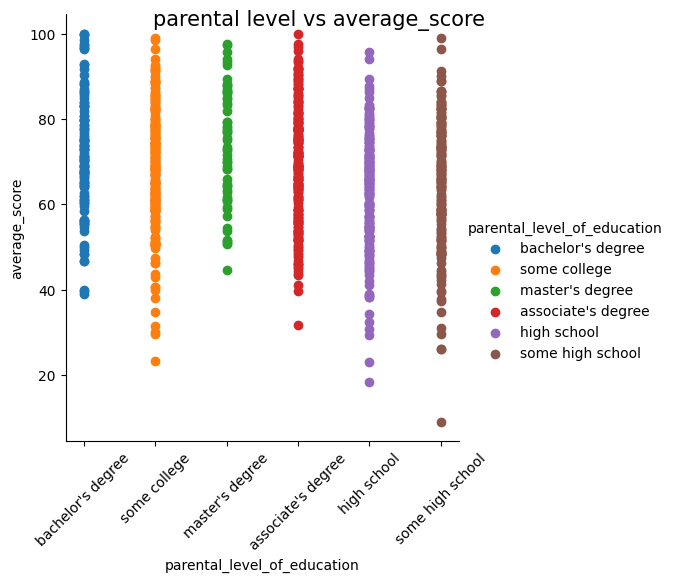

In [ ]:
g = sns.FacetGrid(df, hue="parental_level_of_education", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
g.map(plt.scatter, "parental_level_of_education", "average_score").add_legend()

# Set the title
g.fig.suptitle("parental level vs average_score", fontsize=15)
plt.xticks(rotation=45)
plt.show()

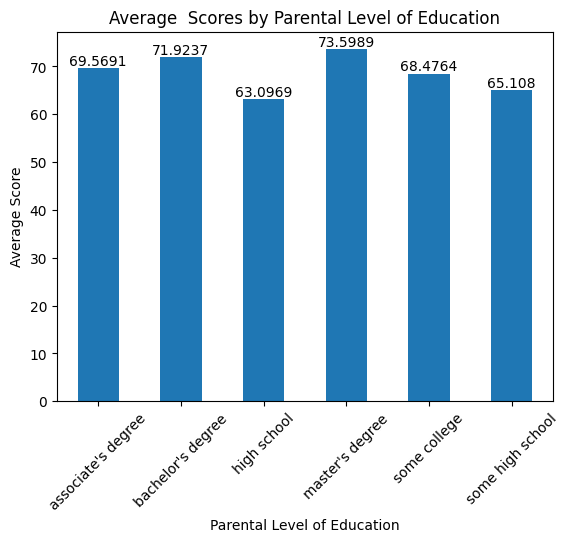

In [ ]:
avgs_score = df.groupby('parental_level_of_education')['average_score'].mean()

bar_plot_avg= avgs_score.plot(kind='bar')
plt.title('Average  Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for i in bar_plot_avg.containers:
    bar_plot_avg.bar_label(i, label_type='edge')


The best performance in exams have childrens whose parents have master's(73,6) or bachelor's(71,9) degree

## Parental education vs scores in every exam

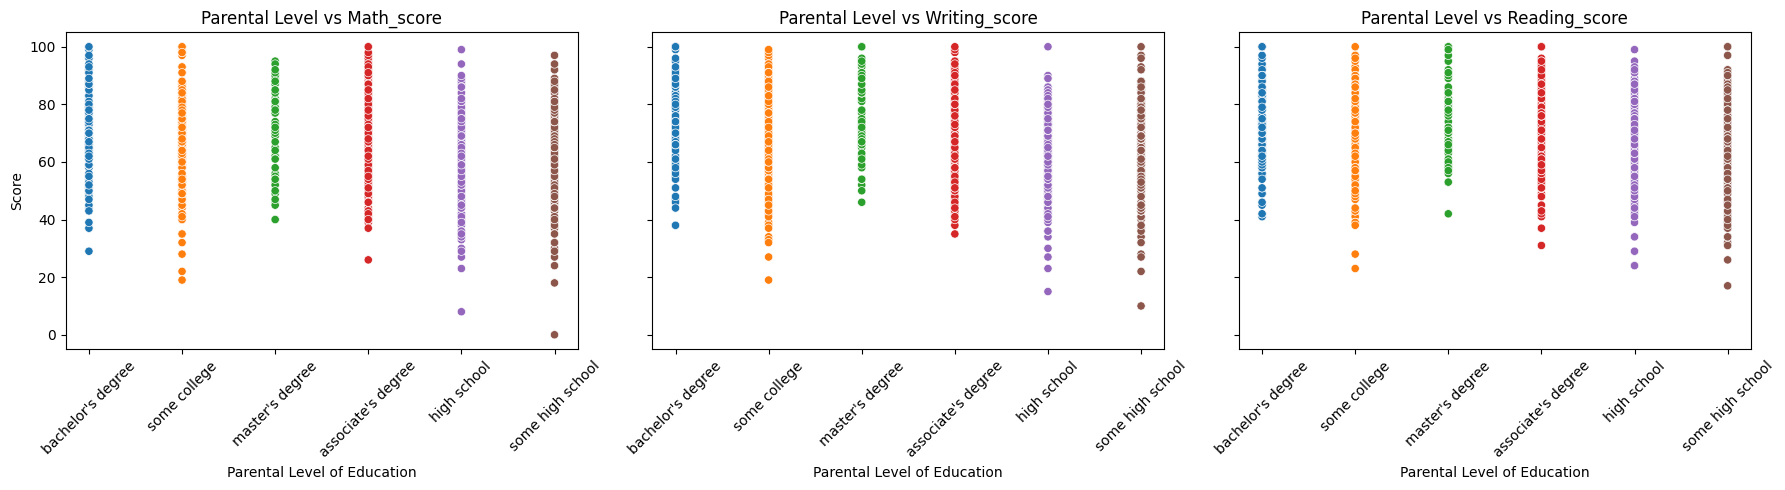

In [ ]:
scores = ['math_score', 'writing_score', 'reading_score']

# Create a figure with subplots arranged in a row
fig, axes = plt.subplots(1, len(scores), figsize=(18, 5), sharey=True)

# Loop through each score and create the corresponding FacetGrid plot
for idx, score in enumerate(scores):
    ax = axes[idx]
    g = sns.scatterplot(data=df, x="parental_level_of_education", y=score, hue="parental_level_of_education", ax=ax, legend=False)
    ax.set_title(f'Parental Level vs {score.capitalize()}')
    ax.set_xlabel('Parental Level of Education')
    if idx == 0:
        ax.set_ylabel('Score')
    else:
        ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

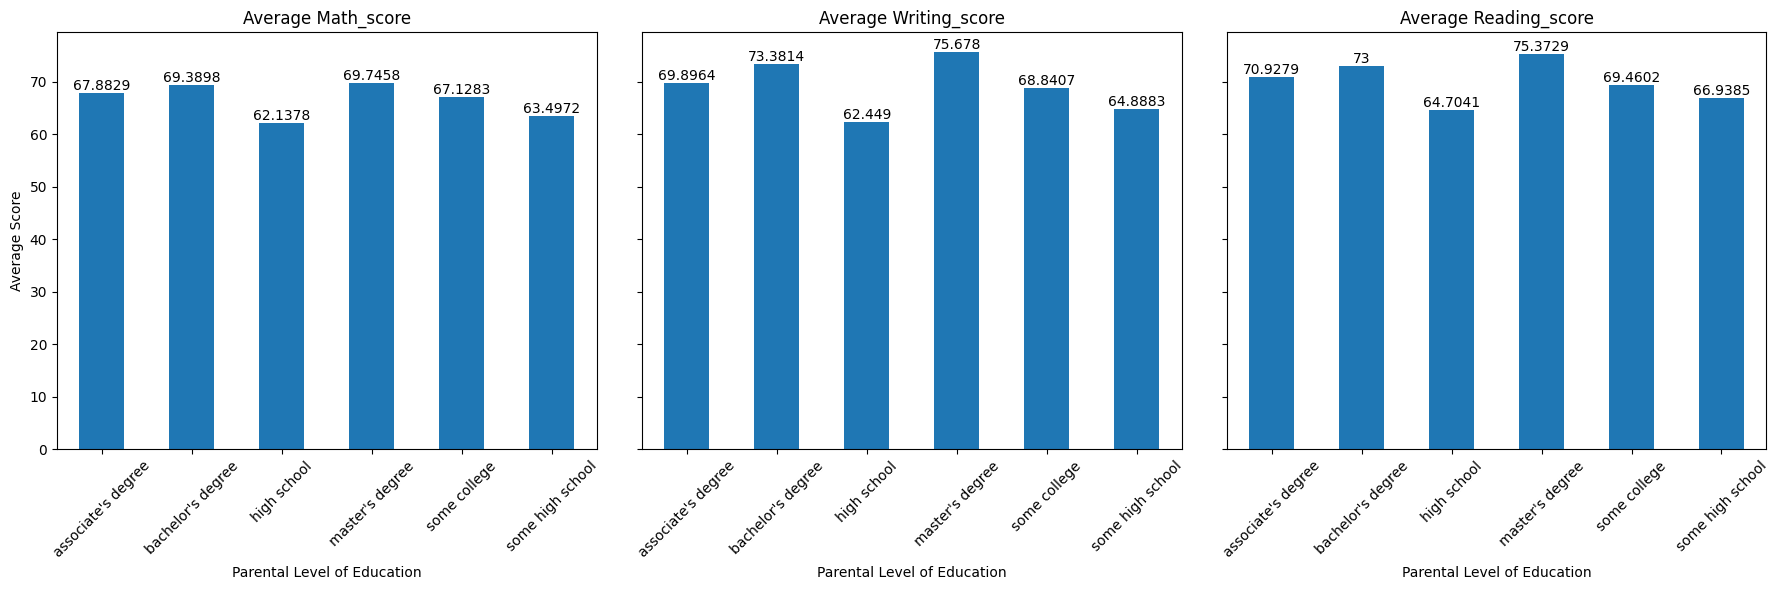

In [ ]:
scores = ['math_score', 'writing_score', 'reading_score']

fig, axes = plt.subplots(1, len(scores), figsize=(18, 6), sharey=True)

# Loop through each score and create the corresponding subplot
for idx, score in enumerate(scores):
    avgs_score = df.groupby('parental_level_of_education')[score].mean()
    ax = axes[idx]

    # Plotting on the respective subplot
    bar_plot_avg = avgs_score.plot(kind='bar', ax=ax)

    # Setting the title and labels for each subplot
    ax.set_title(f'Average {score.capitalize()}')
    ax.set_xlabel('Parental Level of Education')
    ax.set_ylabel('Average Score' if idx == 0 else '')  # Only set y-label for the first subplot

    # Rotating x-ticks for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Adding labels to the bars
    for container in bar_plot_avg.containers:
        bar_plot_avg.bar_label(container, label_type='edge')

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

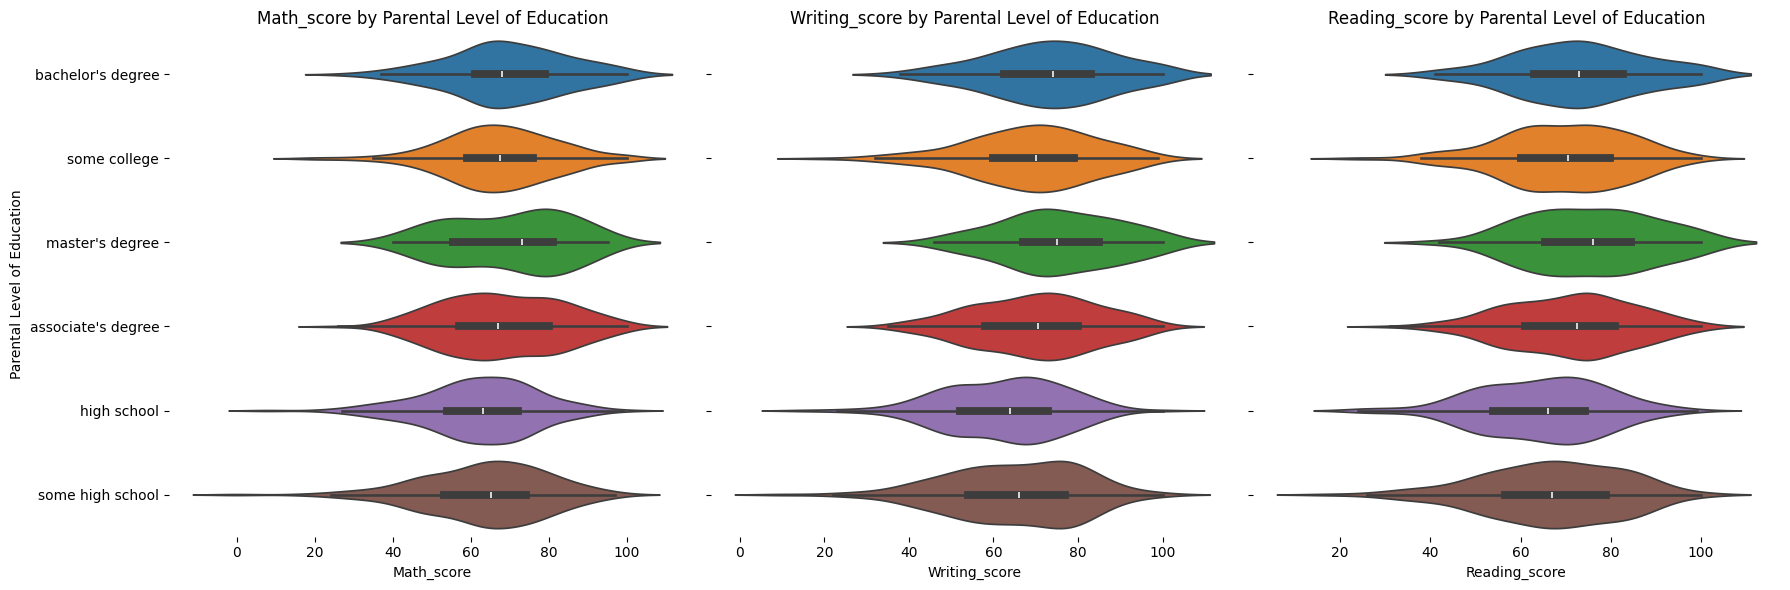

In [ ]:
scores = ['math_score', 'writing_score', 'reading_score']

# Create a figure with subplots arranged in a row
fig, axes = plt.subplots(1, len(scores), figsize=(18, 6), sharey=True)

# Loop through each score and create the corresponding violin plot
for idx, score in enumerate(scores):
    ax = axes[idx]
    sns.violinplot(data=df, x=score, y='parental_level_of_education', hue='parental_level_of_education', ax=ax, inner='box')
    ax.set_title(f'{score.capitalize()} by Parental Level of Education')
    ax.set_xlabel(f'{score.capitalize()}')
    if idx == 0:
        ax.set_ylabel('Parental Level of Education')
    else:
        ax.set_ylabel('')
    sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

The best performance in math exams have childrens whose parents have master's(69.38) or bachelor's(69,75) degree.
However this feature affects the most in writing and reading field

## Gender vs score

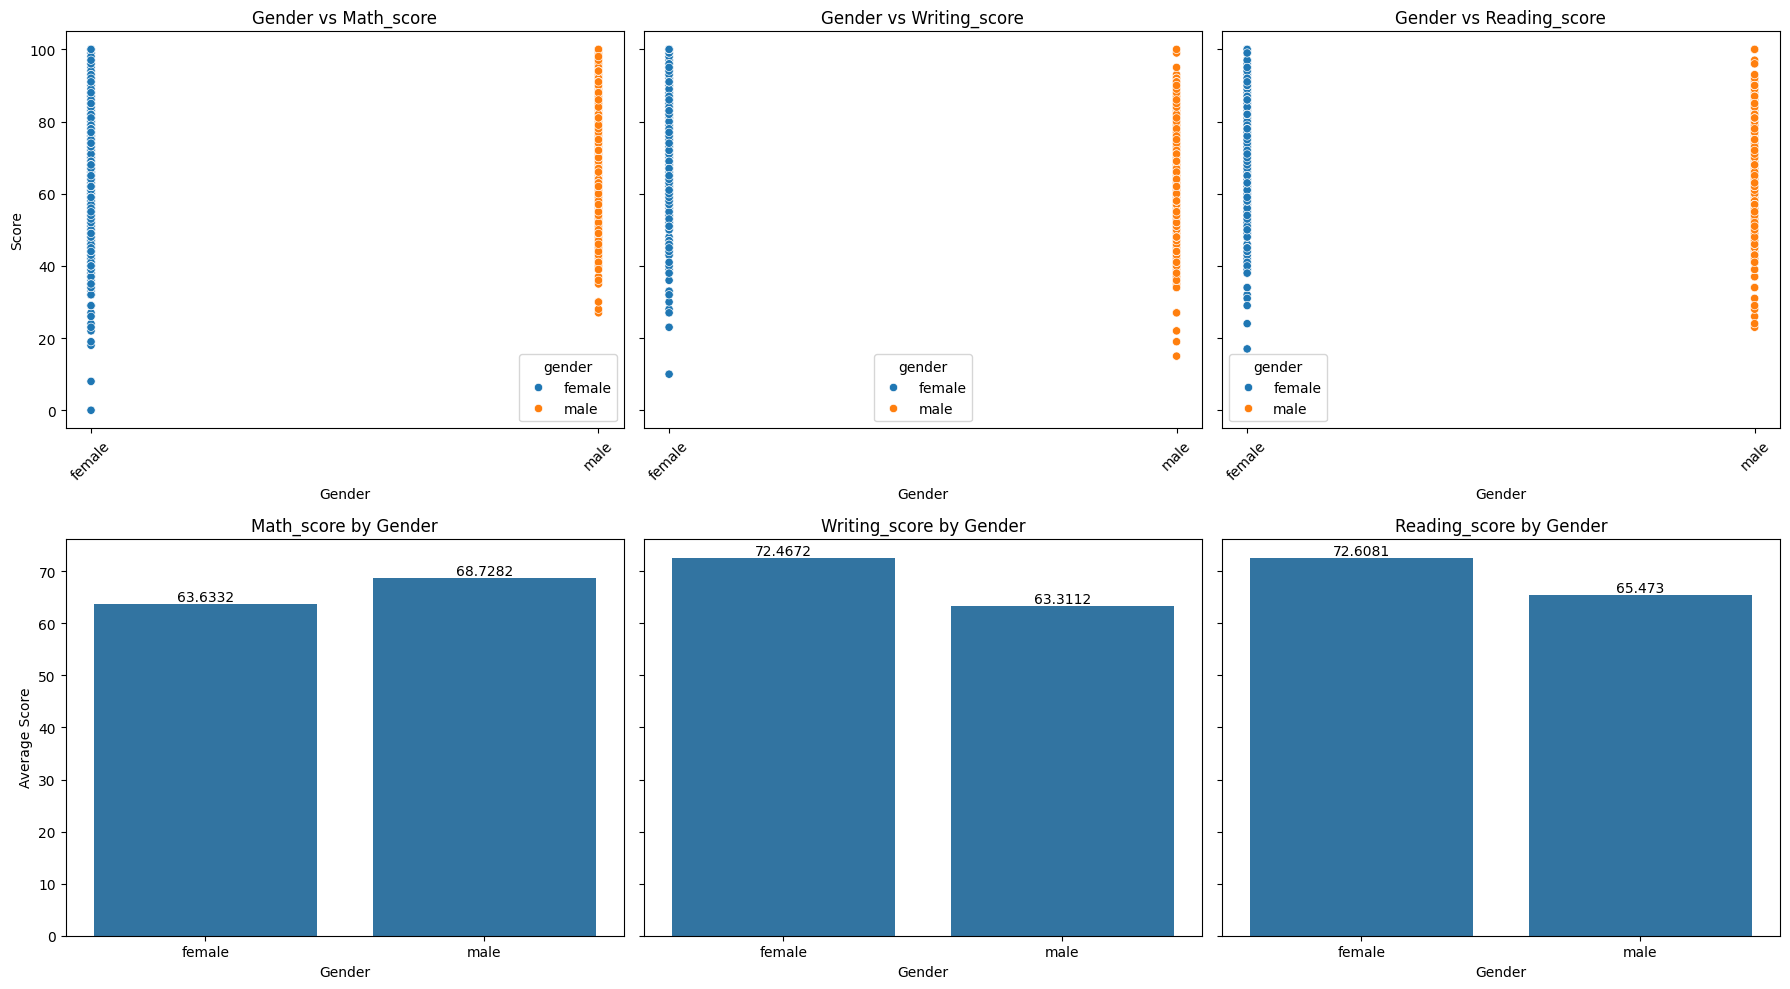

In [ ]:
scores = ['math_score', 'writing_score', 'reading_score']

# Create a figure with subplots arranged in a row
fig, axes = plt.subplots(2, len(scores), figsize=(18, 10), sharey='row')

# Loop through each score and create the corresponding scatter plot and bar plot
for idx, score in enumerate(scores):
    # Scatter plot
    ax_scatter = axes[0, idx]
    sns.scatterplot(data=df, x="gender", y=score, hue="gender", ax=ax_scatter)
    ax_scatter.set_title(f'Gender vs {score.capitalize()}')
    ax_scatter.set_xlabel('Gender')
    if idx == 0:
        ax_scatter.set_ylabel('Score')
    else:
        ax_scatter.set_ylabel('')
    ax_scatter.tick_params(axis='x', rotation=45)

    # Bar plot
    ax_bar = axes[1, idx]
    avgs_score_gender = df.groupby('gender')[score].mean()
    bar_plot = sns.barplot(x=avgs_score_gender.index, y=avgs_score_gender.values, ax=ax_bar)
    ax_bar.set_title(f'{score.capitalize()} by Gender')
    ax_bar.set_xlabel('Gender')
    if idx == 0:
        ax_bar.set_ylabel('Average Score')
    else:
        ax_bar.set_ylabel('')
    # Add edge values to bar plots
    for container in ax_bar.containers:
        ax_bar.bar_label(container, label_type='edge')

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

Gender have great impact on writing_score. Average female writing score is 9,15 percent higher than average male

As plots shows lunch type have impact on exam results. Average score of people with standard lunch type **is higher by 8,6 percent**

### Lunch vs math_score

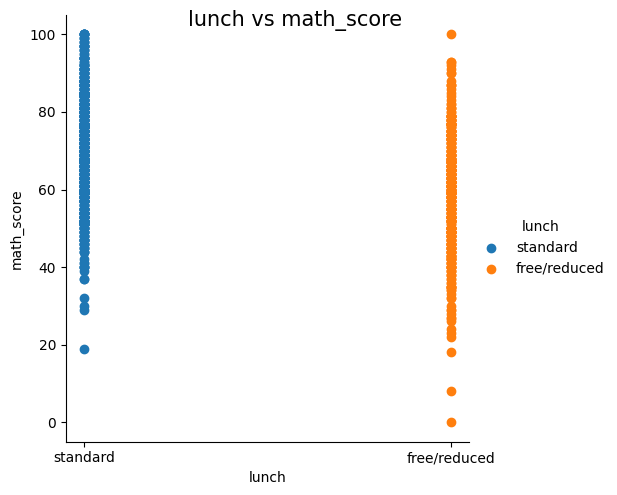

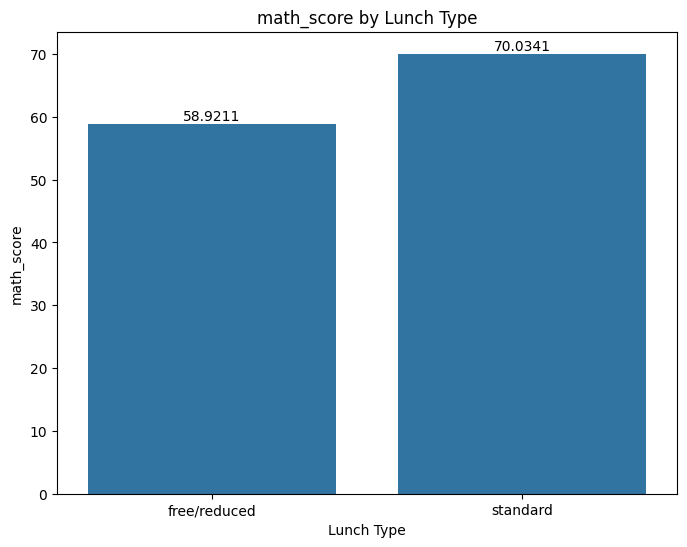

In [ ]:
g = sns.FacetGrid(df, hue="lunch", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
b =g.map(plt.scatter, "lunch", "math_score").add_legend()

g.fig.suptitle("lunch vs math_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('lunch')['math_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('math_score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('math_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()


The lunch type have great impact on performance in math exam. Average math score increases by **10,11** percent

## Lunch vs average score

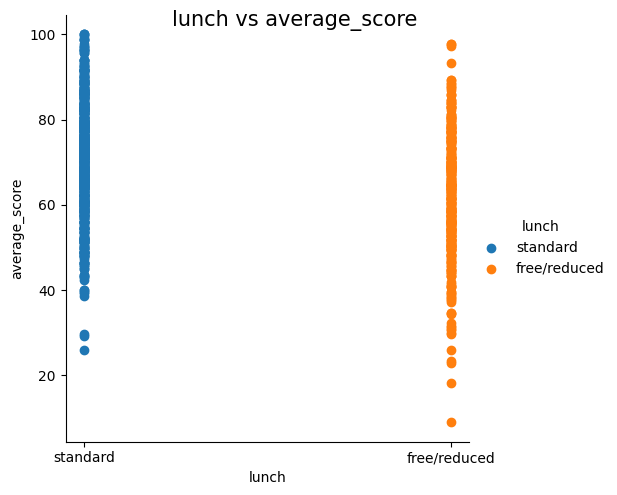

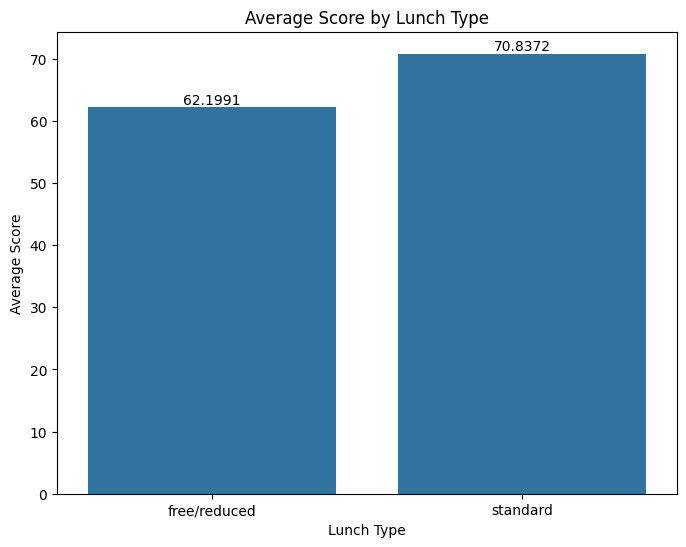

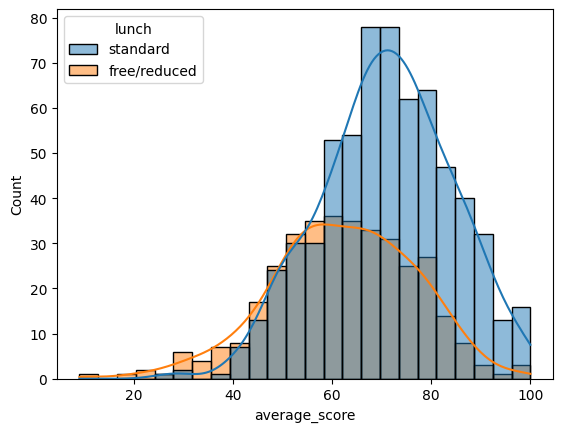

In [ ]:
g = sns.FacetGrid(df, hue="lunch", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
b =g.map(plt.scatter, "lunch", "average_score").add_legend()

g.fig.suptitle("lunch vs average_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('lunch')['average_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('Average Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()

sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.show()


## Test preparation vs exam scores

Firstly, I will visualize writing score due to high correlation score (0.35), and then describe its impact on average score in exams

## Writing score vs test preparation

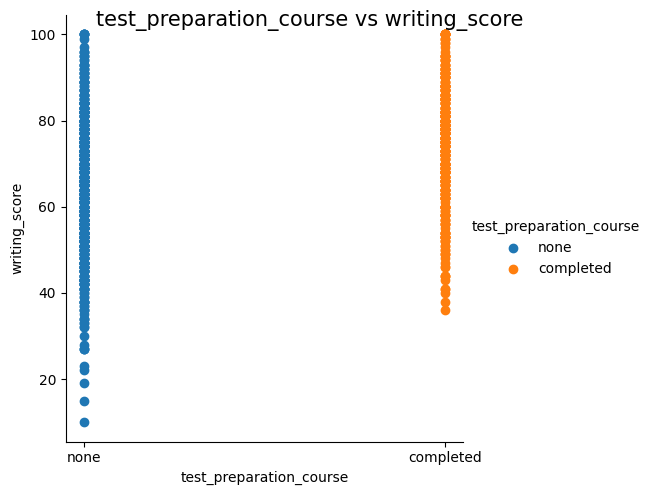

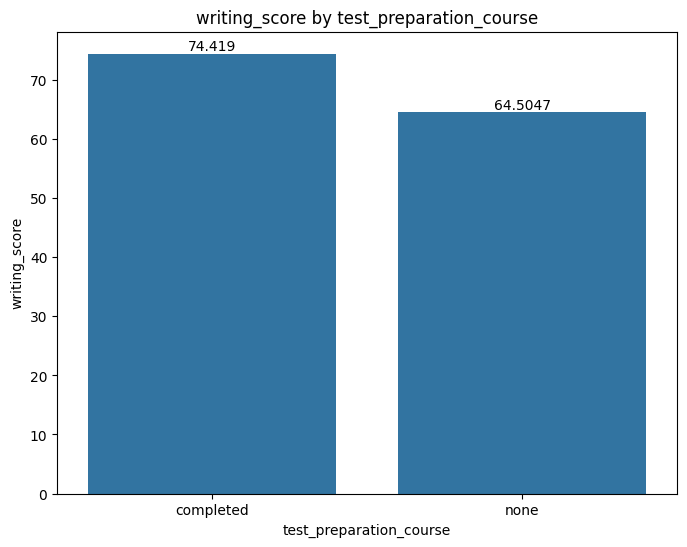

In [ ]:
g = sns.FacetGrid(df, hue="test_preparation_course", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
g.map(plt.scatter, "test_preparation_course", "writing_score").add_legend()

g.fig.suptitle("test_preparation_course vs writing_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('test_preparation_course')['writing_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('writing_score by test_preparation_course')
plt.xlabel('test_preparation_course')
plt.ylabel('writing_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()


Test preparation course have great impact on writing_score. It increase average result by **9.9** percent

## Race vs math_score

### Violin plot
Violin plot is similar to box plot but shows density of data, so it combines the features of a box plot with a kernel density plot, which might be valuable to understand data well

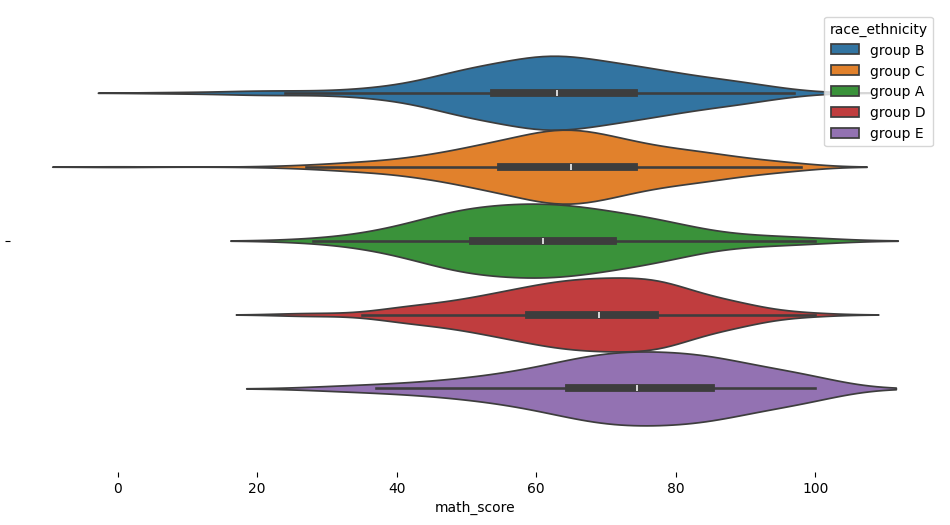

In [ ]:
figsize = (12, 1.2 * len(df['race_ethnicity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='math_score', hue='race_ethnicity', inner='box')
sns.despine(top=True, right=True, bottom=True, left=True)

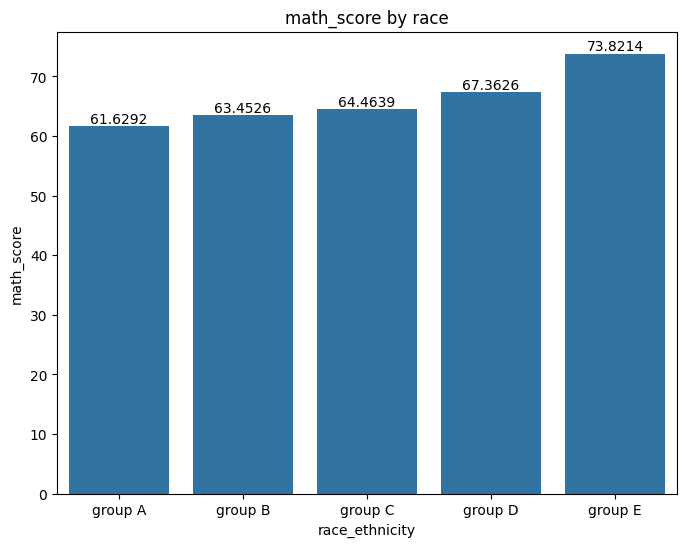

In [ ]:
math_score_race = df.groupby('race_ethnicity')['math_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=math_score_race.index, y=math_score_race.values)
plt.title('math_score by race')
plt.xlabel('race_ethnicity')
plt.ylabel('math_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()

## Visualization summary





Visualization showed that important properites might be:

for math_score:

**race** : difference between the race with highest and lowest average math score is **12,2**

**Lunch type** : Average math score increases by **11,11** percent. Student's with standard lunch performs better

**Parental education** : The best performance in math exams have childrens whose parents have master's(69.38) or bachelor's(69,75) degree



for writing_score:

**test preparation curse** : Test preparation course have great impact on writing_score. It increase average result by ** 12.9** percent

**lunch ** : Average score is incresed but not as much as in math score

**gender** : Gender have great impact on writing_score. Average female writing score is **9,15** percent higher than average male


for reading_score:

**test preparation curse** : Test preparation course have great impact on writing_score. It increase average result by ** 12.4** percent

**lunch ** : Average score is incresed but not as much as in math score

**gender** : Gender have great impact on writing_score. Average female writing score is **9,46** percent higher than average male


Furthermore high correlaction beetwen results in every subject is crucial. The most correlated is reading vs writing (0.95)



# Choosing model
Choosing the right model for dataset is crucial point of work. Let's cosider every aspect of data to choose correctly,

1. Feature types - in this case there are both numerical and categoricial features, so decision tress might handle that
2. Feature interractions -  features don't interact with each other in complex ways
3. Feature importance - all feature seems to be equaly important
4. Data size - there are 1000 objects so is big enough to use more complex methods
5. Data distribution - the data visualization is similar to normal distribution
6. Outliers - This section is questionable and hard to decide. For example, (bachelor's degree - 11.8%, master's degree - 5.9%, in a feature where are 6 possible values). However, at this point, no outliers will be assumed
7. Noise - there are no noise
8. Temporary data - This data is not time-dependent



## Choosen models:

**Decision Trees**: Since decision trees handle both numerical and categorical data well and can provide insights into feature importance

**Gradient Boosting Machines (GBM)**: For potentially better performance at the cost of increased computational complexity

**Linear Regression**: simple yet effective model, especially when normal-like distribution of the data is given.

**Polynomial Regression** -

## Split the data
Goal: Use model to predict math_score

In [ ]:
X = df.drop(['math_score','parental_level_of_education','race_ethnicity','lunch','gender','test_preparation_course','average_score'], axis=1) #use encoded eqivalent only
y = df['math_score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

metrics = [] #to store the data

# Linear Regression
 linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation

RMSE :  5.31745
R2 :  0.8838026201112222
Mean absolute error 4.130145078004055


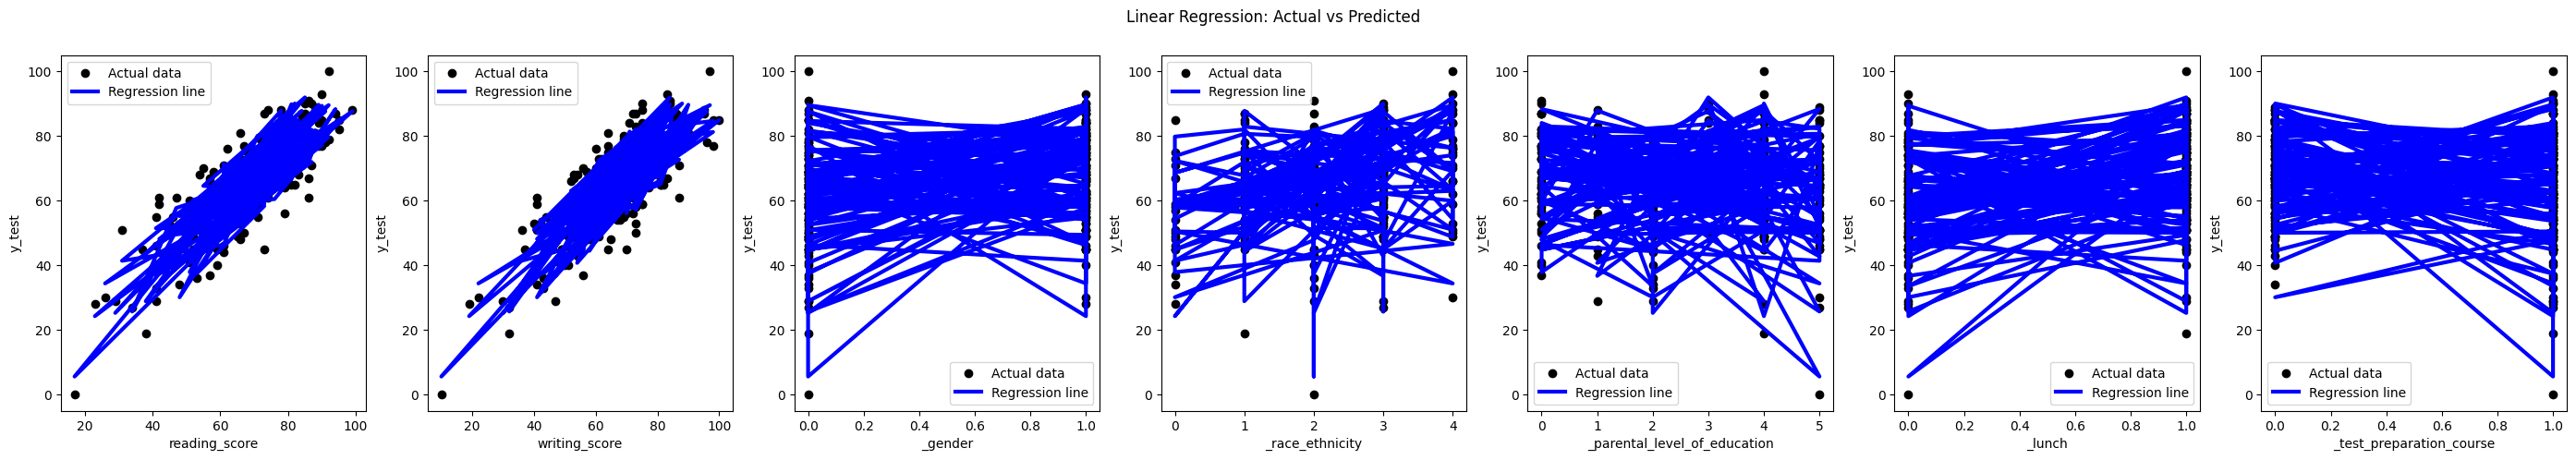

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) #calculate the optimal values of the weights 𝑏₀ and 𝑏₁

y_predict = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_predict))
r2_lr = r2_score(y_test, y_predict)
mae_lr =  mean_absolute_error(y_test, y_predict)


print("RMSE : ",round(rmse_lr,5) ) #(mean expexted difference  beetwen predicted and real value)
print("R2 : ",r2_lr ) #coefficient of determination, tells which amount of variation in 𝑦 can be explained by the dependence on 𝐱
print('Mean absolute error',mae_lr) #typical absolute discrepancies between a dataset’s actual values and projected values




# Plotting each feature against y_test
num_features = X_test.shape[1]
fig, axs = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i in range(num_features):
    feature_name = X_test.columns[i]
    axs[i].scatter(X_test[feature_name], y_test, color="black", label="Actual data")
    axs[i].plot(X_test[feature_name], y_predict, color="blue", linewidth=3, label="Regression line")
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel("y_test")
    axs[i].legend()

plt.suptitle("Linear Regression: Actual vs Predicted")
plt.show()

Perhaps, this model is overfitted. Cross validation might help (testing the model's ability to predict new data that was not used in estimating it)

In [ ]:
from sklearn.model_selection import cross_val_predict

# Split the data into new training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)


# Perform cross-validation on the new training set and obtain predictions
y_cv_predict_new = cross_val_predict(lr, X_train_new, y_train_new, cv=5)  # 5-fold cross-validation

# Fit the model on the new training data
lr.fit(X_train_new, y_train_new)

# Predict using the new test set
y_predict_new = lr.predict(X_test_new)

# Calculate performance metrics for cross-validation predictions
rmse_cv_new = np.sqrt(mean_squared_error(y_train, y_cv_predict_new))
r2_cv_new = r2_score(y_train, y_cv_predict_new)
mae_cv_new = mean_absolute_error(y_train, y_cv_predict_new)

print("Cross-Validation RMSE:", round(rmse_cv_new, 5))
print("Cross-Validation R2:", r2_cv_new)
print("Cross-Validation Mean Absolute Error:", mae_cv_new)

# Calculate performance metrics for new test set predictions
rmse_test_new = np.sqrt(mean_squared_error(y_test_new, y_predict_new))
r2_test_new = r2_score(y_test_new, y_predict_new)
mae_test_new = mean_absolute_error(y_test_new, y_predict_new)

print("\nTest Set RMSE:", round(rmse_test_new, 5))
print("Test Set R2:", r2_test_new)
print("Test Set Mean Absolute Error:", mae_test_new)

# Append the metrics to the list
metrics.append({
    'Model': 'LinearRegression',
    'RMSE': rmse_cv_new,
    'R2': r2_cv_new,
    'MAE': mae_cv_new
})

Cross-Validation RMSE: 5.65868
Cross-Validation R2: 0.8579683504291756
Cross-Validation Mean Absolute Error: 4.5620979368839905

Test Set RMSE: 5.31745
Test Set R2: 0.8838026201112222
Test Set Mean Absolute Error: 4.130145078004055


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=35) #Controls the randomness of the estimator. The features are always randomly permuted at each split

# Train the decision tree on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dts = regressor.predict(X_test)

rmse_DT = np.sqrt(mean_squared_error(y_test, y_pred_dts))
r2_DT =  r2_score(y_test, y_pred_dts)
mae_DT = mean_absolute_error(y_test, y_pred_dts)


print("RMSE : ",rmse_DT )
print("R2 : ",r2_DT)
print('Mean absolute error', mae_DT) #typical absolute discrepancies between a dataset’s actual values and projected values

# Append the metrics to the list
metrics.append({
    'Model': 'DecisionTree',
    'RMSE': rmse_DT,
    'R2': r2_DT,
    'MAE': mae_DT
})

RMSE :  8.153526844255804
R2 :  0.7268002090915368
Mean absolute error 6.28


## Optimalization of DTS

In [ ]:
'''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5) #setting up a grid search for hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=1)
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_predict)
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")
print(f'Mean absolute error', {mae}) #typical absolute discrepancies between a dataset’s actual values and projected values
'''

'\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import r2_score, mean_squared_error\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)\n\n# Define the Random Forest Regressor\nrf_regressor = RandomForestRegressor(random_state=42)\n\n# Hyperparameter tuning using GridSearchCV\nparam_grid = {\n    \'n_estimators\': [50, 100, 150],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\ngrid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=5) #setting up a grid search for hyperparameter tuning\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\n# Train the model with the best hyperparameters\nbest_rf_regressor = RandomForestRegressor(**best_params, random_state=1)\nbest_rf_re

# GradienBoosting
relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Setting SEED for reproducibility
SEED = 23
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 5)

# Fit to training set
gbr.fit(X_train, y_train)

# Predict on test set
y_predict_Gradient = gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_predict_Gradient))
r2_gbr = r2_score(y_test, y_predict_Gradient)
mae_gbr = mean_absolute_error(y_test, y_predict_Gradient)

print("RMSE : ", rmse_gbr) #(mean expexted difference  pomiedzy beetwen predicted and real value)
print("R2 : ", r2_gbr) #coefficient of determination, tells which amount of variation in 𝑦 can be explained by the dependence on 𝐱
print('Mean absolute error', mae_gbr) #typical absolute discrepancies between a dataset’s actual values and projected values


# Append the metrics to the list
metrics.append({
    'Model': 'Gradient Boosting',
    'RMSE': rmse_gbr,
    'R2': r2_gbr,
    'MAE': mae_gbr
})

RMSE :  5.5172413639392985
R2 :  0.8749069104261277
Mean absolute error 4.260188087146793


# Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2) #Generate a new feature matrix consisting of all polynomial combinations
X_train_poly = poly_features.fit_transform(X_train) #transforms  into polynomial features with the 2nd degree

pr = LinearRegression()  #create a linear regression model trained on the polynomial features
pr.fit(X_train_poly, y_train)

X_test_poly = poly_features.fit_transform(X_test)
y_predict_poly = pr.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_predict_poly))
r2_poly = r2_score(y_test, y_predict_poly)
mae_poly = mean_absolute_error(y_test, y_predict_poly)

print("RMSE : ", rmse_poly) #(mean expected difference beetwen predicted and real value)
print("R2 : ", r2_poly) #coefficient of determination, tells which amount of variation in 𝑦 can be explained by the dependence on 𝐱
print('Mean absolute error', mae_poly) #typical absolute discrepancies between a dataset’s actual values and projected values


# Append the metrics to the list
metrics.append({
    'Model': 'Polynomial',
    'RMSE': rmse_poly,
    'R2': r2_poly,
    'MAE': mae_poly
})

RMSE :  5.640372376181781
R2 :  0.8692610761721351
Mean absolute error 4.403727404217687


## Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
import tensorflow as tf
import numpy as np



In [ ]:
# Define the model
model = Sequential()

# Add layers
model.add(Dense(units=16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(units=32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.3))
model.add(Dense(units=1))

# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(X_train, y_train, batch_size=32, verbose=2, epochs=50)

# Predict using the test set
y_predict = model.predict(X_test)

# Evaluate the model performance
rmse_NN = np.sqrt(mean_squared_error(y_test, y_predict))
r2_NN = r2_score(y_test, y_predict)
mae_NN = mean_absolute_error(y_test, y_predict)

print("\nTest Set RMSE:", round(rmse_NN, 5))
print("Test Set R2:", r2_NN)
print("Test Set Mean Absolute Error:", mae_NN)

metrics.append({
    'Model':'Neural Network',
    'RMSE': rmse_NN,
    'R2': r2_NN,
    'MAE': mae_NN

})

Epoch 1/50
25/25 - 3s - loss: 4439.3496 - 3s/epoch - 103ms/step
Epoch 2/50
25/25 - 0s - loss: 3893.0203 - 104ms/epoch - 4ms/step
Epoch 3/50
25/25 - 0s - loss: 2864.2949 - 96ms/epoch - 4ms/step
Epoch 4/50
25/25 - 0s - loss: 1673.0430 - 115ms/epoch - 5ms/step
Epoch 5/50
25/25 - 0s - loss: 1334.1971 - 125ms/epoch - 5ms/step
Epoch 6/50
25/25 - 0s - loss: 1000.4764 - 120ms/epoch - 5ms/step
Epoch 7/50
25/25 - 0s - loss: 721.0259 - 99ms/epoch - 4ms/step
Epoch 8/50
25/25 - 0s - loss: 452.9734 - 102ms/epoch - 4ms/step
Epoch 9/50
25/25 - 0s - loss: 335.5048 - 86ms/epoch - 3ms/step
Epoch 10/50
25/25 - 0s - loss: 333.5274 - 84ms/epoch - 3ms/step
Epoch 11/50
25/25 - 0s - loss: 302.8591 - 76ms/epoch - 3ms/step
Epoch 12/50
25/25 - 0s - loss: 298.8282 - 119ms/epoch - 5ms/step
Epoch 13/50
25/25 - 0s - loss: 274.1615 - 72ms/epoch - 3ms/step
Epoch 14/50
25/25 - 0s - loss: 280.2938 - 80ms/epoch - 3ms/step
Epoch 15/50
25/25 - 0s - loss: 272.9022 - 88ms/epoch - 4ms/step
Epoch 16/50
25/25 - 0s - loss: 256.16

# Summary

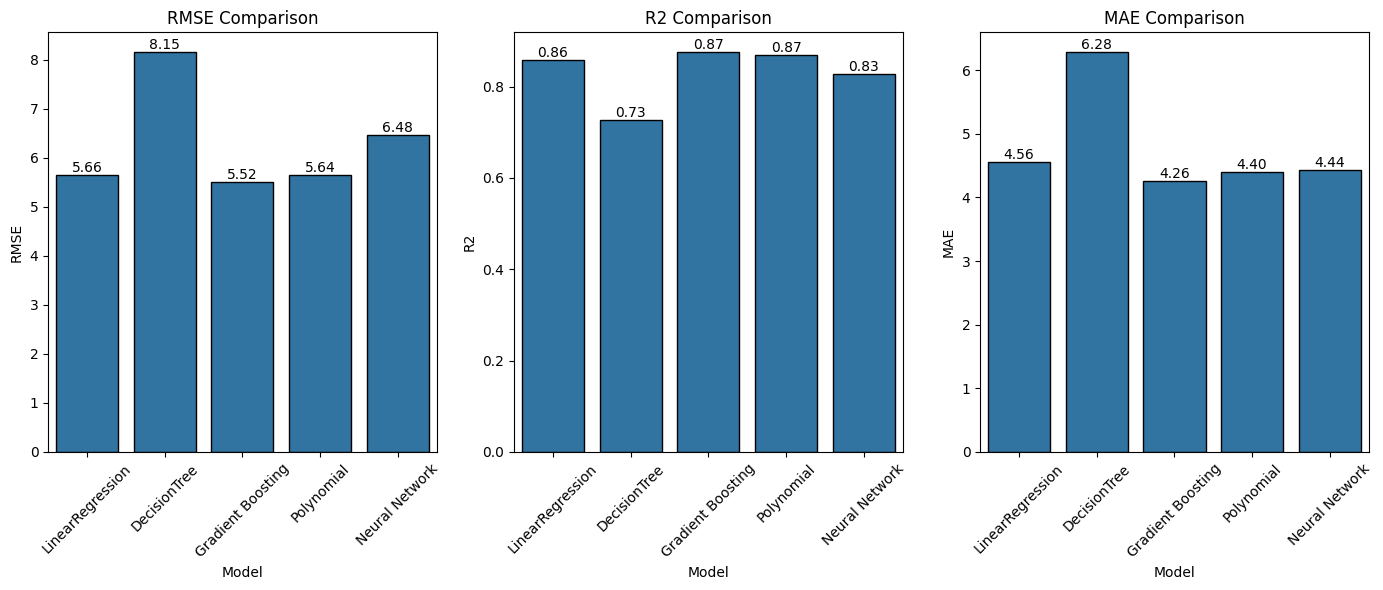

In [ ]:
# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the figure size
plt.figure(figsize=(14, 6))



# Plot RMSE
plt.subplot(1, 3, 1)
ax1 = sns.barplot(x='Model', y='RMSE', data=metrics_df, edgecolor='black')
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# Add the actual values on top of the bars
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2f')

# Plot R2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(x='Model', y='R2', data=metrics_df, edgecolor='black')
plt.title('R2 Comparison')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('R2')

# Add the actual values on top of the bars
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f')

# Plot MAE
plt.subplot(1, 3, 3)
ax3 = sns.barplot(x='Model', y='MAE', data=metrics_df, edgecolor='black')
plt.title('MAE Comparison')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('MAE')

# Add the actual values on top of the bars
for i in ax3.containers:
    ax3.bar_label(i, fmt='%.2f')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Conclusion
**Linear Regression:**

performed well with a low RMSE and MAE, and a high R2 value. This shows that the model has a good fit and can explain 86% of the variance

**Decision Tree:**

model performed worst than others models with the highest RMSE and MAE, and the lowest R2 value. This might be due to overfitting the training data

**Gradient Boosting:**

has the best performance with the lowest RMSE and MAE, and the highest R2 value. This shows that Gradient Boosting is very effective in capturing the patterns in the data and making accurate predictions. (in this case)

**Polynomial Regression:**

also performed very well, with results similar to Gradient Boosting. It achieved a high R2 value and low error metrics, indicating a good fit and strong predictive power.

**Neural Network:**

model performed moderately well. While it has a higher RMSE compared to Gradient Boosting and Polynomial Regression, it still shows a high R2 value and acceptable MAE. This suggests that the Neural Network can effectively capture the underlying patterns in the data but might need further tuning

# Summary
**Key features**

Parental Level of Education: Students whose parents have higher levels of education tend to perform better in math Test Preparation Course: Students who completed test preparation courses generally scored higher in math Lunch Type: Students receiving standard lunch tend to have higher math scores compared to those receiving free/reduced lunch Gender and Ethnicity: Group E tend to have better performance in math exam compared to other groups

**Machine Learning conclusion**

Gradient Boosting performed really well, however Polynomial Regression and Neural Network have similar, but slightly worse performance. DTS have the highest error rates and the lowest R2, potentially due to overfitting.

Future work could focus on further optimizing these models and exploring additional features or techniques to improve their predictions

This study provides a analysis of features affecting student performance and create a foundation for predicting math scores using various machine learning models.

**Potential improvements**

Focus on Polynomial Regression and Neural Network: they showed promise and could be explored further with additional tuning to find underlying patterns and develop feature engineering.